In [1]:
import proplot as pplt
import numpy as np

# %matplotlib inline

# # the following commands make plots look better
# # try to experiment with these parameters to see what they do
# dpi = 300
# plt.rcParams['figure.dpi']= dpi
# plt.rc("savefig", dpi=dpi)
# plt.rc('font', size=10)
# plt.rc('xtick', direction='in') 
# plt.rc('ytick', direction='in')
# plt.rc('xtick.major', pad=5) 
# plt.rc('xtick.minor', pad=5)
# plt.rc('ytick.major', pad=5) 
# plt.rc('ytick.minor', pad=5)
# plt.rc('lines', dotted_pattern = [2., 2.])

## Noise correlation

In [2]:
# load data
covdiff = np.loadtxt('covdiff.txt')
deep_img = np.loadtxt('deep_img.txt')
wide_img = np.loadtxt('wide_img.txt')

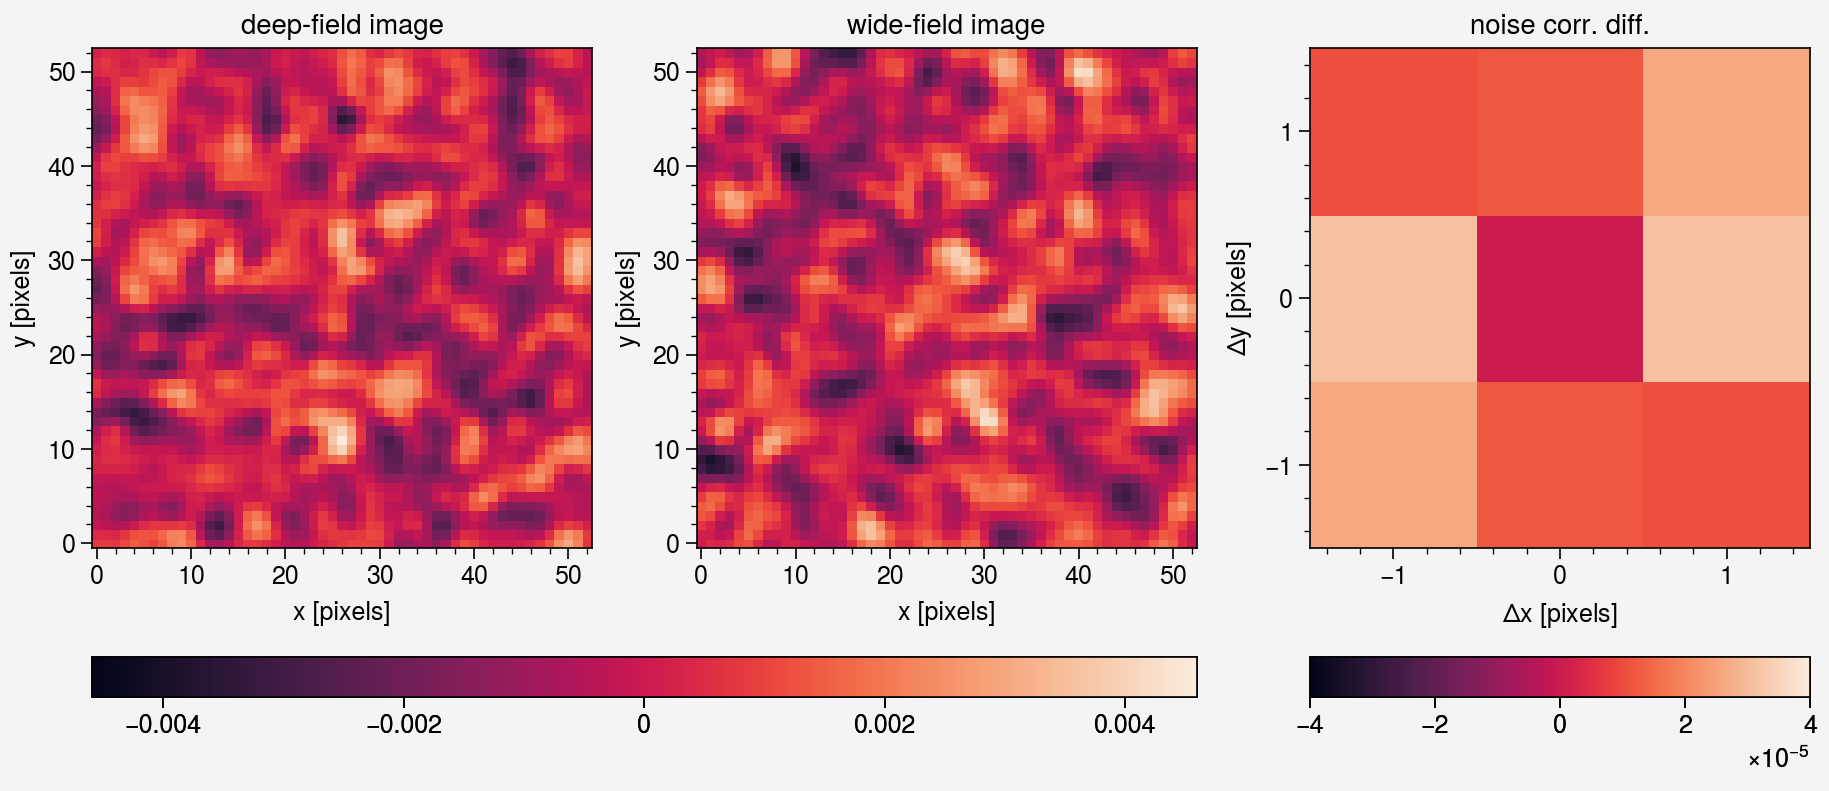

In [3]:
fig, axs = pplt.subplots(nrows=1, ncols=3, share=0)

vval = max(np.abs(deep_img).max(), np.abs(wide_img).max())
pcm_noise = axs[0].pcolormesh(
    deep_img, vmax=vval, vmin=-vval, cmap='rocket', discrete=False)
axs[1].pcolormesh(wide_img, vmax=vval, vmin=-vval, cmap='rocket', discrete=False)

axs[0].set_title('deep-field image')
axs[0].set_xlabel("x [pixels]")
axs[0].set_ylabel("y [pixels]")
axs[1].set_title('wide-field image')
axs[1].set_xlabel("x [pixels]")
axs[1].set_ylabel("y [pixels]")

axs[2].set_title('noise corr. diff.')
axs[2].set_xlabel("$\Delta x$ [pixels]")
axs[2].set_ylabel("$\Delta y$ [pixels]")

pcm_cov = axs[2].pcolormesh(
    np.arange(-1, 2, 1), np.arange(-1, 2, 1),
    np.abs(covdiff), 
    vmax=4e-5, vmin=-4e-5, 
    cmap='rocket',
    discrete=False,
)
axs[2].format(xticks=[-1, 0, 1], yticks=[-1, 0, 1])

fig.colorbar(
    pcm_noise, cols=(1, 2),
    location='b'
)
fig.colorbar(
    pcm_cov, cols=3,
    location='b'
)

fig.savefig('../noise_corr.png', dpi=200)

## S/N vs. PSF+Depth

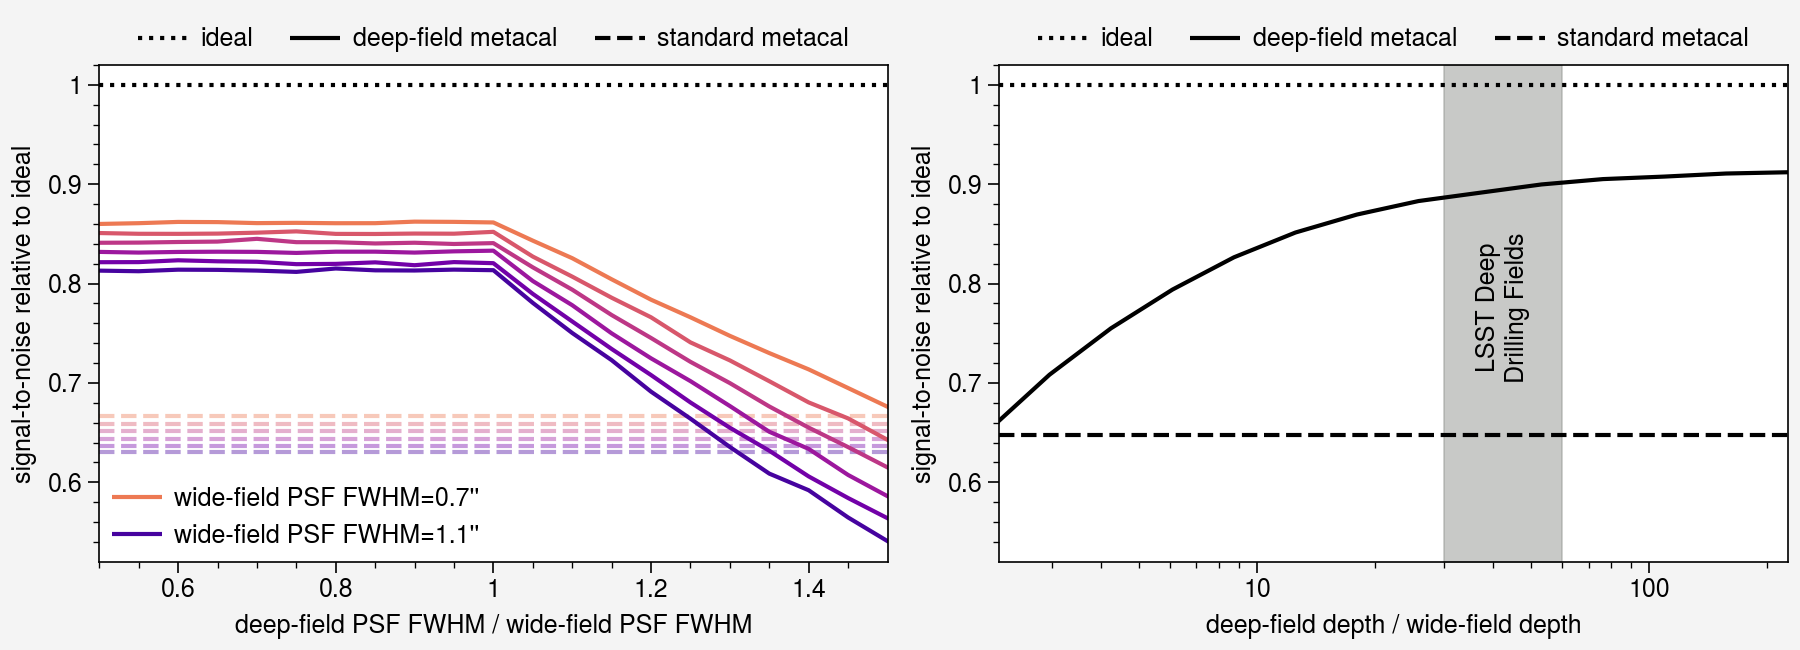

In [92]:
fig, axs = pplt.subplots(nrows=1, ncols=2, share=0, figsize=(9, 3.25))

ratio = np.loadtxt('ratio.txt') # deep-metacal S/N
reg_ratio = np.loadtxt('reg_ratio.txt') # regular metacal S/N
widepsf = np.loadtxt('widepsf.txt') # wide psf sizes
x = np.linspace(0.5, 1.5, 21)

ax = axs[0]
ax.grid(False)
ax.set_xlabel('deep-field PSF FWHM / wide-field PSF FWHM')
ax.set_ylabel('signal-to-noise relative to ideal')

colors = pplt.get_colors("plasma", samples=10)[:7][::-1]

# plot regular metacal S/N
for i in range(6):
    ax.plot(
        x,
        reg_ratio[i],
        color=colors[i],
        ls='--',
        alpha=0.4
    )

# plot the deep-metacal S/N
color_leg_handles = []
color_leg_handles.append(ax.plot(
    x, ratio[0],
    label='wide-field PSF FWHM=0.7\'\'',
    color=colors[0],
))
for i in range(1,5):
    ax.plot(
        x,
        ratio[i],
        color=colors[i],
    )
color_leg_handles.append(ax.plot(
    x,
    ratio[5],
    label='wide-field PSF FWHM=1.1\'\'',
    color=colors[5],
))

leg_handles = []
leg_handles.append(ax.axhline(1, color='black', ls=':', label="ideal"))
leg_handles.append(ax.axhline(0, color='black', label="deep-field metacal"))
leg_handles.append(ax.axhline(0, color='black', ls='--', label="standard metacal"))

ax.set_ylim(0.52, 1.02)
ax.legend(leg_handles, frameon=False, ncols=3, loc="top")
ax.legend(color_leg_handles, frameon=False, ncols=1)


ax = axs[1]
ax.grid(False)

raw = 18.471993767747183 # S/N in wide image
reg = 11.962841594762859 # S/N in regular metacal
y = np.loadtxt('epoch.txt') # S/N dependence on epoch
x = np.logspace(np.log10(1), np.log10(225), 16) # epoch numbers

ax.axhline(1.0, color='black', ls=':', label='ideal')
ax.plot(x, y, color='black', label='deep-field metacal')
ax.axhline(reg/raw, color='black', ls='--', label='standard metacal')
ax.set_xscale('log')
ax.set_xlim(2.2, 225)
ax.set_ylim(0.52, 1.02)
ax.set_ylabel('signal-to-noise relative to ideal')
ax.set_xlabel('deep-field depth / wide-field depth')

ax.legend(frameon=False, loc='top', ncol=3)
ax.fill_betweenx(
    [0.52, 1.02], 30, 60, alpha=0.5, color='gray'
)

ax.text(
    10**((np.log10(30) + np.log10(60))/2), 
    0.7, 
    "LSST Deep\nDrilling Fields", 
    rotation=90, 
    color='k',
    horizontalalignment='center',
    verticalalignment='bottom',
)

fig.savefig('../s2n_ratio.pdf')

## Sample Variance

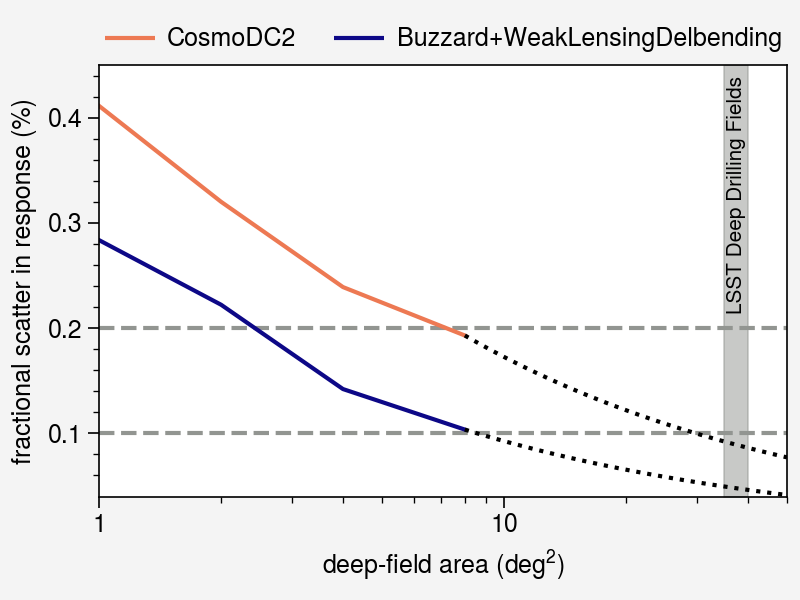

In [130]:
areas = np.array([1, 2, 4, 8])
dc2_std = np.array([0.00411, 0.00320, 0.00239, 0.00193])*100 # in percentage
slac_std = np.array([0.002835, 0.002222, 0.001421, 0.001036])*100 # in percentage


colors = pplt.get_colors("plasma", samples=10)[:7][::-1]

fig, ax = pplt.subplots(figsize=(4, 3))

ax.grid(False)
ax.plot(areas, dc2_std,label='CosmoDC2', color=colors[0])
ax.plot(areas, slac_std,label='Buzzard+WeakLensingDelbending', color=colors[-1])
ax.set_ylabel('fractional scatter in response (%)')
ax.set_xlabel(r'deep-field area (deg$^2$)')
ax.axhline(0.1, ls='--', color='grey', zorder=0)
ax.axhline(0.2, ls='--', color='grey', zorder=0)
ax.legend(frameon=False, ncol=2, loc='top')

ax.set_xscale("log")
# ax.set_yscale("log")

xv = np.linspace(8, 50, 100)
yv = dc2_std[-1] * np.sqrt(areas[-1]/xv)
ax.plot(xv, yv, "k:")

xv = np.linspace(8, 50, 100)
yv = slac_std[-1] * np.sqrt(areas[-1]/xv)
ax.plot(xv, yv, "k:")

ax.set_ylim(0.04, 0.45)

ax.fill_betweenx(
    [0.04, 0.45], 35, 40, alpha=0.5, color='gray'
)

ax.text(
    10**((np.log10(35) + np.log10(40))/2), 
    0.44, 
    "LSST Deep Drilling Fields", 
    rotation=90, 
    color='k',
    horizontalalignment='center',
    verticalalignment='top',
    size="small"
)


fig.savefig('../sample_var.pdf')